# Final Project for Machine Learning and Big Data Course, Data Science and Application 
## Metro College of Technology

### October, 2021

### Ana Clara Tupinambá Freitas, oriented by Professor Tareq Jaber

# Poker Hand

## Introduction

Poker is one of the most casino games in the world. This study has the goal of classifying the hand that one person possess. 


**Attribute Information:

    S1 "Suit of card #1"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

    C1 "Rank of card #1"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

    S2 "Suit of card #2"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

    C2 "Rank of card #2"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

    S3 "Suit of card #3"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

    C3 "Rank of card #3"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

    S4 "Suit of card #4"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

    C4 "Rank of card #4"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

    S5 "Suit of card #5"
    Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

    C5 "Rank of card 5"
    Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

    CLASS "Poker Hand"
    Ordinal (0-9)
        0: Nothing in hand; not a recognized poker hand
        1: One pair; one pair of equal ranks within five cards
        2: Two pairs; two pairs of equal ranks within five cards
        3: Three of a kind; three equal ranks within five cards
        4: Straight; five cards, sequentially ranked with no gaps
        5: Flush; five cards with the same suit
        6: Full house; pair + different rank three of a kind
        7: Four of a kind; four equal ranks within five cards
        8: Straight flush; straight + flush
        9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

The **target** feature in this study will be: **Class**.

For more about the game: https://bicyclecards.com/how-to-play/basics-of-poker/

Data Source: https://data.world/uci/poker-hands/workspace/project-summary?agentid=uci&datasetid=poker-hands, downloaded at Oct 15th,2021

# Importing Packages

In [1]:
import os
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import kstest
import researchpy as rp
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats.contingency import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.utils import shuffle

from sklearn import datasets, svm, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets, neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier #Multilayer Perceptron

import warnings


# User Defined Functions

## Univariate Categorical:

In [2]:
def uni_categorical(df,size):
    '''This function returns summarization and visual for univariate analysis of categorical features of a dataset'''
    print('############### Univariate analysis - Categorical ###############')
    df = df.select_dtypes(exclude=np.number) #extracting only non-numerical features
    for i in df.columns:
     #   if type(df.loc[0, i]) == str: #checking type of features
# Summarization
            d1 = df[i].value_counts()
            d2 = round(df[i].value_counts(normalize=True)*100, 2)
            d3 = pd.concat([d1, d2], axis=1)
            d3.columns = ['Count', 'Percentage']
            print('\nThis is univariate analysis for', "'", i, "'", '\n', d3)

 # Visualization
            d1 = pd.DataFrame(d1).T
            d1 = pd.melt(d1,var_name=str(i),value_vars=d1) 
            fig, ax = plt.subplots()
            if size == 'L':
                fig.set_size_inches(12, 10)
            else:
                fig.set_size_inches(5, 5)
            sns.set_context("paper", font_scale=1.5)
            plot1=sns.barplot(y=d1['value'],x=d1[i], data=d1)
            for p, label in zip(plot1.patches, d1['value']):
                ax.annotate(label, (p.get_x()+0.3, p.get_height()+2))
            plt.xticks(rotation=45, ha='right')
            ax.set_title('Univariate plot')
            plt.show()
    print('\n\n')

## Univariate Numerical:

In [3]:
def uni_numerical(df):
    '''This function returns summarization and visual for univariate analysis of numerical features of a dataset'''
    warnings.filterwarnings('ignore')
# Summarization
    print('############### Univariate analysis - Numerical ###############')
    df.describe()

    Summary = df.describe().to_dict()#df.describe()
    for i in Summary:
        Summary[i]['count'] = df[i].count()
        Summary[i]['variance'] = df[i].var()
        Summary[i]['IQR'] = Summary[i]['75%'] - Summary[i]['25%']
        Summary[i]['range'] = Summary[i]['max'] - Summary[i]['min']
        Summary[i]['skewness'] = df[i].skew()
        Summary[i]['kurtosis'] = df[i].kurtosis()
        Summary[i]['mode'] = df[i].mode() #axis='columns'
#    print(Summary)
        print('\nThis is univariate analysis for',"'", i, "'", '\n', Summary[i])
# Visualization
        # Histogram and Boxplot
        sns.set_palette("dark") # colorblind   pastel
        sns.set(style="white") #whitegrid ticks
        sns.set_context("paper", font_scale=1.5)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.12, .88)})
        f.set_size_inches(12, 8)
        sns.distplot(a=df[i], hist=True, kde=True, rug=True, ax=ax_hist)
        sns.boxplot(x=df[i], ax=ax_box)
        ax_box.set_title('Univariate plot')
        ax_box.set(xlabel='')
        plt.show()
# normality test
#        stat, p_normal = shapiro(df[i])
        stat, p_normal = kstest(df[i],'norm')    
        print('Kolmogorov\'s Statistics=%.3f, p=%.3f' % (stat, p_normal))
# interpretation
        alpha = 0.05
        if p_normal > alpha:
            print('Normality\'s test result: Sample looks Gaussian (fail to reject H0)')
        else:
            print('Normality\'s test result: Sample does not look Gaussian (reject H0)')

## Bivariate Numerical target x Numerical features:

In [4]:
def bi_numerical_num(df, var_target):
    '''This function returns summarization, visual,and test of independency for bivariate analysis of numerical x numerical features. FIgFigure size: 'S' or 'L' '''
    
    print('############### Bivariate analysis - Numerical x Numerical ###############')
# Printing Assumptions:
    print('\nCorrelation (how strong the correlation is):\n Null hypothesis: there’s no association between variables.\n\n Assumptions:\n \t1.Normal distribution for both variables for pearson;\n  \t2.homoscedasticity assumes that data is equally distributed about the regression line.\n \t3.Linear? \n \t\tLinear: pearson\n \t\tMonotonically related (not normal) use the following methods: spearman kendall hoeffding \n Generical interpretation: \n \t |0.7| < p -> strong correlation \n \t |0.7| > p > |0.5| -> moderately correlated \n \t |0.4| > p -> weakly correlated or no correlation ')

# Verifying datatypes extract only numerics
    df = df.select_dtypes(include=np.number)
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# Visualization
    sns.set_palette("dark") # colorblind   pastel
    sns.set(style="white",font_scale=1) #whitegrid ticks
    
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(8,8)) 
    sns.heatmap(round(df.corr(method='pearson'),2),annot=True, annot_kws={"fontsize":12},square=True, linewidths=0.01,mask=mask,ax=ax)
    plt.title('Correlation Heatmap - Pearson')   
    plt.show()
    
   # mask = np.zeros_like(df.corr())
   # mask[np.triu_indices_from(mask)] = True
    #fig, ax = plt.subplots(figsize=(8,8))
    #sns.heatmap(round(df.corr(method='spearman'),2),annot=True, annot_kws={"fontsize":12},square=True, linewidths=0.01,mask=mask,ax=ax)
    #plt.title('Correlation Heatmap - Spearman') 
    #plt.show()

## Bivariate Numerical target x Categorical features:

In [5]:

def bi_categorical_cont(df,var_target,size):                
    '''This function returns summarization, visual, and test of independency for bivariate analysis of continuous target x categorical  features,taking a continuous variable as the target.  '''
    
    print('############### Bivariate analysis - Categorical x Numerical ###############')
    print('\n*If Categorical has 2 levels: Mann-Whitney U test, if more: One-way ANOVA/Kruskal H test')

# Defining alpha:
    alpha = 0.05
# Verifying datatypes extract only numerics
    df_num = df.select_dtypes(include=np.number) 
    
# If target is numeric:         
    if var_target in df_num.columns:
        df_cat = df.select_dtypes(exclude=np.number)
        for i in df_cat.columns:
            if i != var_target:
                vis = pd.crosstab(df[var_target],df[i], margins = False)
                tab = rp.summary_cont(df[var_target].groupby(df[i]),decimals=3)#conf=0.95
#                print(tab)
                result = df.groupby(i)[var_target].apply(list) 
#                print('Result:',result)
# Printing Assumptions:
                if len(result.index) == 2:
                    print('\nThis is Mann-Whitney U test for' , var_target, 'and',i )
                    print('\nMann-Whitney U test:\n Null hypothesis: The distribution of scores for the two groups are equal.\n Assumptions:\n 1.Dependent variable that is measured at the continuous or ordinal level.\n 2.Groups are independent of one another. \n 3.What\'s the shape of each group distribution.\n\t a) Similar shapes: \n\t\t Alternative hypothesis: the medians of the two groups are not equal.\n\t b) Different shapes:\n\t\t Alternative hypothesis: the distribution of scores for the two groups are not equal.') 
                    print('\nSummary:')
                    print(tab)
# Visualization
                    sns.set_palette("dark") # colorblind   pastel
                    sns.set(style="white") # whitegrid ticks
                    fig, ax = plt.subplots()
                    fig.set_size_inches(12, 4)
                    sns.boxplot(x=df[i],y=df[var_target], data=df)  
                    sns.stripplot(x=df[i],y=df[var_target], data=df,
              size=4, color=".3", linewidth=0)
                    plt.xticks(rotation=45, ha='right')
                    ax.set_title('Bivariate plot: ' + var_target + ' and ' + i)
                    plt.show()
                    l = pd.melt(vis,var_name=str(i),value_vars=vis)
                    l = pd.DataFrame(l)
                
                else:
# ANOVA
# Printing Assumptions: 
                    print('\nThis is ANOVA/Kruskal for' , var_target, 'and',i,'\n' )
                    print('One-way ANOVA Assumptions\n In order to run a one-way ANOVA the following assumptions must be met:\n 1.The response of interest is continuous and normally distributed for each treatment group.\n \tCLT :\n \t\tIf looks normal each group must have more than 30 observations – no need for Normality’s test;\n \t\tIf moderately skewed(|0.5| < skewness < |1.0|), each group must have more than 100 observations – no need for Normality’s test;\n\t*If not normal, proceed to Kruskal test.\n 2.Treatment groups are independent of one another. \n 3.There are no major outliers.\n 4.A check for unequal variances will help determine which version of a one-way ANOVA is most appropriate (Levene’s test, Null hypothesis: variances are equal between groups):\n \tA .If variances are equal, then the assumptions of a standard one-way ANOVA are met.\n \tB. If variances are unequal, then a Kruskal’s test is appropriate.\n\n*Kruskal\'s Null hypothesis: H0: the group populations have equal dominance; i.e. when one element is drawn at random from each group population, the largest (or smallest, or second smallest, etc.) element is equally likely to come from any one of the group populations or H0: the group population medians are equal(if groups distributions have the same shape) ')
                    print('\nSummary:')
                    print(tab)
# Visualization
                    sns.set_palette("dark") # colorblind   pastel
                    sns.set(style="white") # whitegrid ticks
                    fig, ax = plt.subplots()
                    if size == 'L':
                        fig.set_size_inches(50, 4)
                    else:
                        fig.set_size_inches(12, 4)
                    sns.set_context("paper", font_scale=1.2)
                    sns.boxplot(x=df[i],y=df[var_target], data=df)  
                    sns.stripplot(x=df[i],y=df[var_target], data=df,
              size=4, color=".3", linewidth=0)
                    plt.xticks(rotation=45, ha='right',fontsize=12)
                    ax.set_title('Bivariate plot: ' + var_target + ' and ' + i)
                    plt.show()
                    l = pd.melt(vis,var_name=str(i),value_vars=vis)
                    l = pd.DataFrame(l)
                    
            if len(result.index) == 2:
#T-test                             
                stat_l, p_lev = levene(*result)
                print('\nLevene\'s Statistics=%.3f, p=%.3f' % (stat_l, p_lev))
                if p_lev  > alpha:#Equal varinaces
                    stat_u, p_u = mannwhitneyu(*result)
                    print('Levene\'s test result: Equal variances (fail to reject H0)')
                    print('\nMann-Whitney U \'s Null hypothesis: The distribution of scores for the two groups are equal.')
                    print('\nMann-Whitney U \'s Statistics (equal variances)=%.3f, p=%.3f' % (stat_u, p_u))
# interpretation
                    if p_u > alpha: 
                        print('Mann-Whitney U \'s test result: There are no differences in medians, samples medians are equal. (fail to reject H0)')
                    else:
                        print('Mann-Whitney U \'s test result: The medians of the two groups are not equal. (reject H0)')  
                        
                else:#Unequal variances
                    stat_u, p_u = mannwhitneyu(*result)
                    print('Levene\'s test result: Unequal variances (reject H0)')
                    print('\nMann-Whitney U \'s Statistics (unequal variances)=%.3f, p=%.3f' % (stat_u, p_u))
# interpretation
                    if p_u > alpha: 
                        print('\nMann-Whitney U \'s Null hypothesis: The distribution of scores for the two groups are equal.')
                        print('Mann-Whitney U \'s test result: The distribution of scores for the two groups are equal. (fail to reject H0)')
                    else:
                        print('\nMann-Whitney U \'s Null hypothesis: The distribution of scores for the two groups are equal.')
                        print('Mann-Whitney U \'s test result: The distribution of scores for the two groups are not equal. (reject H0)')   
                    
  
# ANOVA
            else:    
                stat_l, p_lev = levene(*result)
                print('\nLevene\'s Statistics=%.3f, p=%.3f' % (stat_l, p_lev))
                p_one = np.nan
                if p_lev  > alpha: #Equal variances
                    stat_one, p_one = f_oneway(*result)
                    stat_k, p_h =  kruskal(*result)
                    print('Levene\'s test result: equal variances (reject H0)')
                    print('\nKruskal\'s Statistics(equal variances)=%.3f, p=%.3f' % (stat_k, p_h))
                    print('\nANOVA\'s Statistics(equal variances)=%.3f, p=%.3f' % (stat_one, p_one))
                    if p_one > alpha: 
                        print('\nANOVA\'s Null hypothesis: There are  differences in means')
                        print('ANOVA\'s test result: There are no differences in means, samples are equal. (fail to reject H0)')
                    else:
                        print('\nANOVA\'s Null hypothesis: There are  differences in means')
                        print('ANOVA\'s test result: There are  differences in means (reject H0)')   
                else: # Unequal variances
                    stat_k, p_h  = kruskal(*result)
                    print('Levene\'s test result: Unequal variances (reject H0)')
                    print('\nKruskal\'s Statistics(unequal variances)=%.3f, p=%.3f' % (stat_k, p_h))
                
                if p_h > alpha: 
                    print('\nKruskal\'s Null hypothesis: All sample distributions are equal.')
                    print('Kruskal\'s test result: All sample distributions are equal. (fail to reject H0)')
                else:
                    print('\nKruskal\'s Null hypothesis: All sample distributions are equal.')
                    print('Kruskal\'s test result: One or more sample distributions are not equal. (reject H0)')   

    print('\n\n')

## Bivariate Categorical target x Categorical features:

In [6]:
def bi_categorical_cat(df_var_pred, df_var_target,size):
    '''This function returns summarization, visual,and test of independency for bivariate analysis of categorical x categorical features. df[var_pred], df[var_target]'''
    
    contigency_table = pd.crosstab(df_var_pred,df_var_target)
   # print('This is contingency table for:\n\n',contigency_table,'\n')

    alpha = 0.05
    chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)
    if size == 'L':
        contigency_table.plot(kind='bar',figsize=(14,8))
    else:
        contigency_table.plot(kind='bar',figsize=(14,3))
    plt.title('Bivariate Analysis, chisq(p-value):'+str(p_val))
    plt.ylim(0,450)
    #plt.legend(loc=5)
    plt.legend(ncol=2,fontsize=10)
    plt.show()
    
    print("Chi-sqare's results:\n")
    if p_val > alpha:
        print('DOF: ',dof,'\np-value= ',p_val,"\n\n Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.")
    else:
        print('DOF: ',dof,'\np-value= ',p_val,"\n\n Reject Null Hypothesis. There's some correlation between variables at 5% significance level.")   

## Checking Missing values

In [7]:
def chck_miss(df):

    Total = df.isnull().count().sort_values(ascending=True)        
    Missing = df.isnull().sum().sort_values(ascending=True)   

    Percentage_Miss = round((Missing/Total)*100,2)

    Summary = pd.concat([Total,Missing, Percentage_Miss],axis=1,keys=['Total','# Missing','% Missing'],sort=True)
          
    print('Are there any missing value?')                    
    print(Summary)         

    del Total, Missing, Percentage_Miss, Summary 

#### Setting warnings OFF

In [8]:
#warnings.filterwarnings('ignore')

# Loading Data Frame

In [9]:
# Changing Directory
os.chdir(r'D:\1_Metro College\Courses\ML and Big Data\Project\Classification\Data')

#Reading Data (training)
df = pd.read_csv('poker-hand-training-true_data.csv',header=None)

df.rename(columns={0:'S1 "Suit of card #1"',
                    1:'C1 "Rank of card #1"',
                    2:'S2 "Suit of card #2"',
                    3:'C2 "Rank of card #2"',
                    4:'S3 "Suit of card #3"',
                    5:'C3 "Rank of card #3"',
                    6:'S4 "Suit of card #4"',
                    7:'C4 "Rank of card #4"',
                    8:'S5 "Suit of card #5"',
                    9:'C5 "Rank of card 5"',
                    10:'CLASS "Poker Hand"'
                  },inplace=True)

#Renaming classes
dict = {0: 'Nothing in hand; not a recognized poker hand',
        1: 'One pair; one pair of equal ranks within five cards',
        2: 'Two pairs; two pairs of equal ranks within five cards',
        3: 'Three of a kind; three equal ranks within five cards',
        4: 'Straight; five cards, sequentially ranked with no gaps',
        5: 'Flush; five cards with the same suit',
        6: 'Full house; pair + different rank three of a kind',
        7: 'Four of a kind; four equal ranks within five cards',
        8: 'Straight flush; straight + flush',
        9: 'Royal flush; {Ace, King, Queen, Jack, Ten} + flush'}

for key in dict.keys():
    df['CLASS "Poker Hand"'] = df['CLASS "Poker Hand"'].replace(key, dict[key])
    
#Reading Data (testing)
    
df_test = pd.read_csv('poker-hand-testing_data.csv',header=None)    

df_test.rename(columns={0:'S1 "Suit of card #1"',
                    1:'C1 "Rank of card #1"',
                    2:'S2 "Suit of card #2"',
                    3:'C2 "Rank of card #2"',
                    4:'S3 "Suit of card #3"',
                    5:'C3 "Rank of card #3"',
                    6:'S4 "Suit of card #4"',
                    7:'C4 "Rank of card #4"',
                    8:'S5 "Suit of card #5"',
                    9:'C5 "Rank of card 5"',
                    10:'CLASS "Poker Hand"'
                  },inplace=True)

#Renaming classes
for key in dict.keys():
    df_test['CLASS "Poker Hand"'] = df_test['CLASS "Poker Hand"'].replace(key, dict[key])


## First look at the dataset:
We see that there are 11 features and 2670 observations in the dataset in it's downloaded form:

In [10]:
print('Shape of training dataset: ',df.shape)
print('Shape of testing dataset: ',df_test.shape)

Shape of training dataset:  (2670, 11)
Shape of testing dataset:  (3342, 11)


First and Last observations:

In [11]:
df

,"S1 ""Suit of card #1""","C1 ""Rank of card #1""","S2 ""Suit of card #2""","C2 ""Rank of card #2""","S3 ""Suit of card #3""","C3 ""Rank of card #3""","S4 ""Suit of card #4""","C4 ""Rank of card #4""","S5 ""Suit of card #5""","C5 ""Rank of card 5""","CLASS ""Poker Hand"""
0,1,10,1.0,11.0,1.0,13.0,1.0,12.0,1.0,1.0,"Royal flush; {Ace, King, Queen, Jack, Ten} + f..."
1,2,11,2.0,13.0,2.0,10.0,2.0,12.0,2.0,1.0,"Royal flush; {Ace, King, Queen, Jack, Ten} + f..."
2,3,12,3.0,11.0,3.0,13.0,3.0,10.0,3.0,1.0,"Royal flush; {Ace, King, Queen, Jack, Ten} + f..."
3,4,10,4.0,11.0,4.0,1.0,4.0,13.0,4.0,12.0,"Royal flush; {Ace, King, Queen, Jack, Ten} + f..."
4,4,1,4.0,13.0,4.0,12.0,4.0,11.0,4.0,10.0,"Royal flush; {Ace, King, Queen, Jack, Ten} + f..."
...,...,...,...,...,...,...,...,...,...,...,...
2665,4,6,4.0,2.0,3.0,10.0,1.0,6.0,3.0,7.0,One pair; one pair of equal ranks within five ...
2666,2,5,1.0,3.0,1.0,7.0,3.0,13.0,1.0,4.0,Nothing in hand; not a recognized poker hand
2667,2,10,4.0,9.0,4.0,8.0,2.0,4.0,4.0,5.0,Nothing in hand; not a recognized poker hand
2668,2,4,4.0,3.0,2.0,11.0,1.0,10.0,3.0,1.0,Nothing in hand; not a recognized poker hand


#### What are the different data types of the dataframe?

We see that most features are numerical,with the exception of target which was transformed upon loading the dataset.

In [12]:
print('Features types:\n ',df.dtypes) 

Features types:
  S1 "Suit of card #1"      int64
C1 "Rank of card #1"      int64
S2 "Suit of card #2"    float64
C2 "Rank of card #2"    float64
S3 "Suit of card #3"    float64
C3 "Rank of card #3"    float64
S4 "Suit of card #4"    float64
C4 "Rank of card #4"    float64
S5 "Suit of card #5"    float64
C5 "Rank of card 5"     float64
CLASS "Poker Hand"       object
dtype: object


# Verifying and, if existent, Handling of Duplicates and Missing Values

#### Is there duplicates?

We can see that there no duplicated values.

In [13]:
print('There are', df.duplicated().sum(), 'duplicated values in training data set' )
df.drop_duplicates(keep='last',inplace=True)

print('There are', df_test.duplicated().sum(), 'duplicated values in testing data set' )
df.drop_duplicates(keep='last',inplace=True)

There are 0 duplicated values in training data set
There are 0 duplicated values in testing data set


#### Checking for missing values(training data set):

In [14]:
chck_miss(df)

Are there any missing value?
                      Total  # Missing  % Missing
C1 "Rank of card #1"   2670          0       0.00
C2 "Rank of card #2"   2670          1       0.04
C3 "Rank of card #3"   2670          1       0.04
C4 "Rank of card #4"   2670          1       0.04
C5 "Rank of card 5"    2670          1       0.04
CLASS "Poker Hand"     2670          1       0.04
S1 "Suit of card #1"   2670          0       0.00
S2 "Suit of card #2"   2670          1       0.04
S3 "Suit of card #3"   2670          1       0.04
S4 "Suit of card #4"   2670          1       0.04
S5 "Suit of card #5"   2670          1       0.04


We see that the percentage of missing values are 0.04% or one instance. This instance will be dropped.

In [15]:
df.dropna(inplace=True)

#### Checking for missing values(testing data set):

In [16]:
chck_miss(df_test)

Are there any missing value?
                      Total  # Missing  % Missing
C1 "Rank of card #1"   3342          0       0.00
C2 "Rank of card #2"   3342          0       0.00
C3 "Rank of card #3"   3342          0       0.00
C4 "Rank of card #4"   3342          0       0.00
C5 "Rank of card 5"    3342          1       0.03
CLASS "Poker Hand"     3342          1       0.03
S1 "Suit of card #1"   3342          0       0.00
S2 "Suit of card #2"   3342          0       0.00
S3 "Suit of card #3"   3342          0       0.00
S4 "Suit of card #4"   3342          0       0.00
S5 "Suit of card #5"   3342          0       0.00


We see that the percentage of missing values are 0.03% or one instance. This instance will be dropped.

In [17]:
df_test.dropna(inplace=True)

## Recoding features values(for EDA):

In [18]:
#Renaming Suits:
dict_suits = {1: 'Hearts',
        2: 'Spades',
        3: 'Diamonds',
        4: 'Clubs'
       }

#Renaming Ranks:
dict_rank = {1: 'Ace',
        2: '2',
        3: '3',
        4: '4',
        5: '5',
        6: '6',
        7: '7',
        8: '8',
        9: '9',
        10: '10',
        11:'Jack',
        12:'Queen',
        13:'King'           
            }
#Copy of df (features values renamed for exploratory analysis):
df1 = df.copy()

#Renaming values
for key in dict_suits.keys():
    df1['S1 "Suit of card #1"'] = df1['S1 "Suit of card #1"'].replace(key, dict_suits[key])
    df1['S2 "Suit of card #2"'] = df1['S2 "Suit of card #2"'].replace(key, dict_suits[key])
    df1['S3 "Suit of card #3"'] = df1['S3 "Suit of card #3"'].replace(key, dict_suits[key])
    df1['S4 "Suit of card #4"'] = df1['S4 "Suit of card #4"'].replace(key, dict_suits[key])
    df1['S5 "Suit of card #5"'] = df1['S5 "Suit of card #5"'].replace(key, dict_suits[key])
    
for key in dict_rank.keys():
    df1['C1 "Rank of card #1"'] = df1['C1 "Rank of card #1"'].replace(key, dict_rank[key])
    df1['C2 "Rank of card #2"'] = df1['C2 "Rank of card #2"'].replace(key, dict_rank[key])
    df1['C3 "Rank of card #3"'] = df1['C3 "Rank of card #3"'].replace(key, dict_rank[key])
    df1['C4 "Rank of card #4"'] = df1['C4 "Rank of card #4"'].replace(key, dict_rank[key])
    df1['C5 "Rank of card 5"'] = df1['C5 "Rank of card 5"'].replace(key, dict_rank[key])

Setting categorical features as such:

In [19]:
for i in df1.columns:
    if type(df1.loc[0,i]) == str: #checking type of features
        df1[i] = df1[i].astype('category')
        print('These are the categories of \'',i,' \':\n',df1[i].values.categories, '\n')
del i

These are the categories of ' S1 "Suit of card #1"  ':
 Index(['Clubs', 'Diamonds', 'Hearts', 'Spades'], dtype='object') 

These are the categories of ' C1 "Rank of card #1"  ':
 Index(['10', '2', '3', '4', '5', '6', '7', '8', '9', 'Ace', 'Jack', 'King',
       'Queen'],
      dtype='object') 

These are the categories of ' S2 "Suit of card #2"  ':
 Index(['Clubs', 'Diamonds', 'Hearts', 'Spades'], dtype='object') 

These are the categories of ' C2 "Rank of card #2"  ':
 Index(['10', '2', '3', '4', '5', '6', '7', '8', '9', 'Ace', 'Jack', 'King',
       'Queen'],
      dtype='object') 

These are the categories of ' S3 "Suit of card #3"  ':
 Index(['Clubs', 'Diamonds', 'Hearts', 'Spades'], dtype='object') 

These are the categories of ' C3 "Rank of card #3"  ':
 Index(['10', '2', '3', '4', '5', '6', '7', '8', '9', 'Ace', 'Jack', 'King',
       'Queen'],
      dtype='object') 

These are the categories of ' S4 "Suit of card #4"  ':
 Index(['Clubs', 'Diamonds', 'Hearts', 'Spades'], dtype='

#### Checking Summary of all features of the dataset:

In [20]:
df1.describe(include='all').T

,count,unique,top,freq
"S1 ""Suit of card #1""",2669,4,Clubs,703
"C1 ""Rank of card #1""",2669,13,Ace,228
"S2 ""Suit of card #2""",2669,4,Hearts,693
"C2 ""Rank of card #2""",2669,13,King,224
"S3 ""Suit of card #3""",2669,4,Clubs,702
"C3 ""Rank of card #3""",2669,13,5,228
"S4 ""Suit of card #4""",2669,4,Diamonds,692
"C4 ""Rank of card #4""",2669,13,6,233
"S5 ""Suit of card #5""",2669,4,Diamonds,718
"C5 ""Rank of card 5""",2669,13,5,222


#### Looking at categorical features:

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' S1 "Suit of card #1" ' 
           Count  Percentage
Clubs       703       26.34
Spades      674       25.25
Diamonds    663       24.84
Hearts      629       23.57


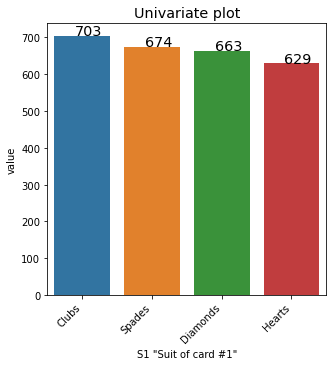

In [21]:
uni_categorical(df1[['S1 "Suit of card #1"']],'S')

We can see that the distribution is almost equal, with Clubs ♧ having most instances and Hearts ❤ with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' C1 "Rank of card #1" ' 
        Count  Percentage
Ace      228        8.54
Queen    227        8.51
9        224        8.39
2        220        8.24
King     210        7.87
Jack     209        7.83
7        208        7.79
10       206        7.72
4        202        7.57
3        188        7.04
8        184        6.89
5        183        6.86
6        180        6.74


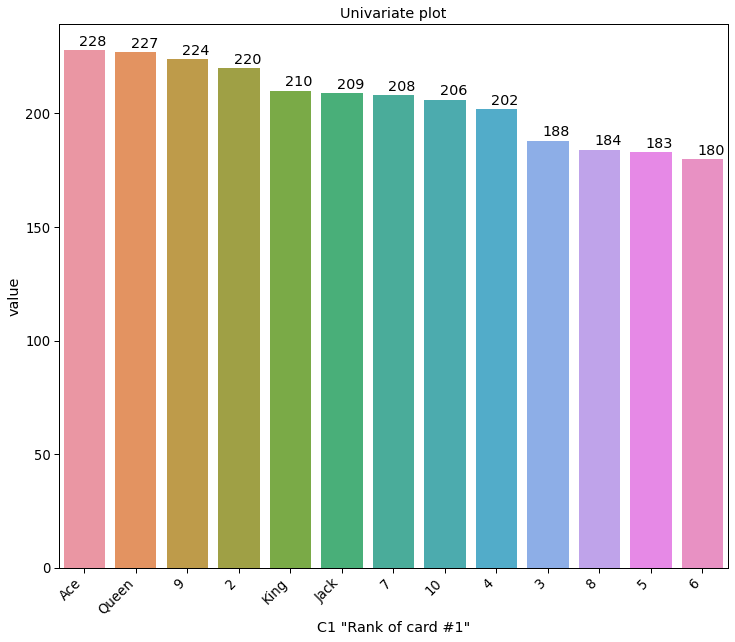

In [22]:
uni_categorical(df1[['C1 "Rank of card #1"']],'L')

We can see that the distribution is almost equal, with Ace having most instances and 6 with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' S2 "Suit of card #2" ' 
           Count  Percentage
Hearts      693       25.96
Clubs       674       25.25
Spades      660       24.73
Diamonds    642       24.05


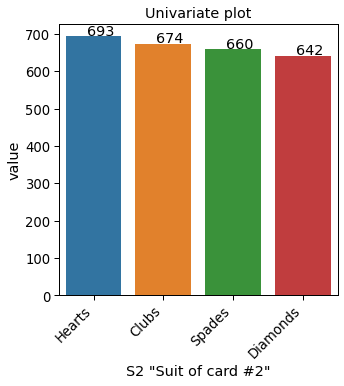

In [23]:
uni_categorical(df1[['S2 "Suit of card #2"']],'S')

We can see that the distribution is almost equal, with Hearts ❤  having most instances and Diamonds ♦ with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' C2 "Rank of card #2" ' 
        Count  Percentage
King     224        8.39
Ace      221        8.28
Queen    221        8.28
6        217        8.13
2        212        7.94
7        211        7.91
3        209        7.83
4        204        7.64
8        195        7.31
10       192        7.19
5        191        7.16
Jack     190        7.12
9        182        6.82


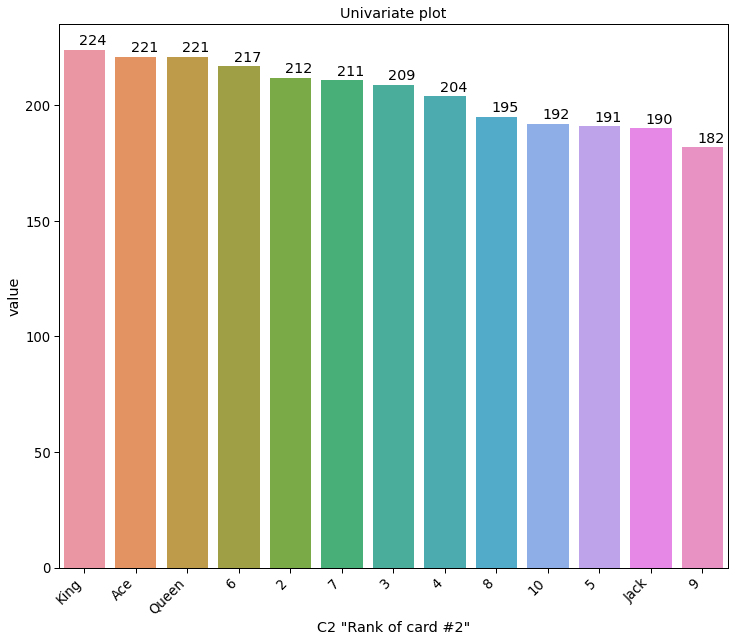

In [24]:
uni_categorical(df1[['C2 "Rank of card #2"']],'L')

We can see that the distribution is almost equal, with King having most instances and 9 with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' S3 "Suit of card #3" ' 
           Count  Percentage
Clubs       702       26.30
Spades      670       25.10
Diamonds    657       24.62
Hearts      640       23.98


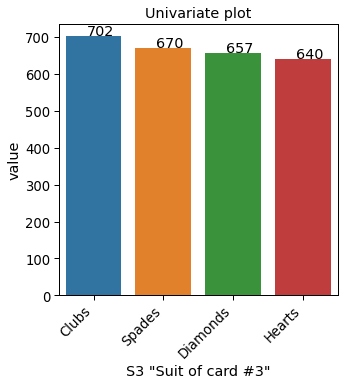

In [25]:
uni_categorical(df1[['S3 "Suit of card #3"']],'S')

We can see that the distribution is almost equal, with Clubs ♧ having most instances and Hearts ❤   with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' C3 "Rank of card #3" ' 
        Count  Percentage
5        228        8.54
10       225        8.43
6        219        8.21
Queen    217        8.13
Jack     216        8.09
4        207        7.76
8        206        7.72
7        204        7.64
2        201        7.53
King     195        7.31
3        191        7.16
9        182        6.82
Ace      178        6.67


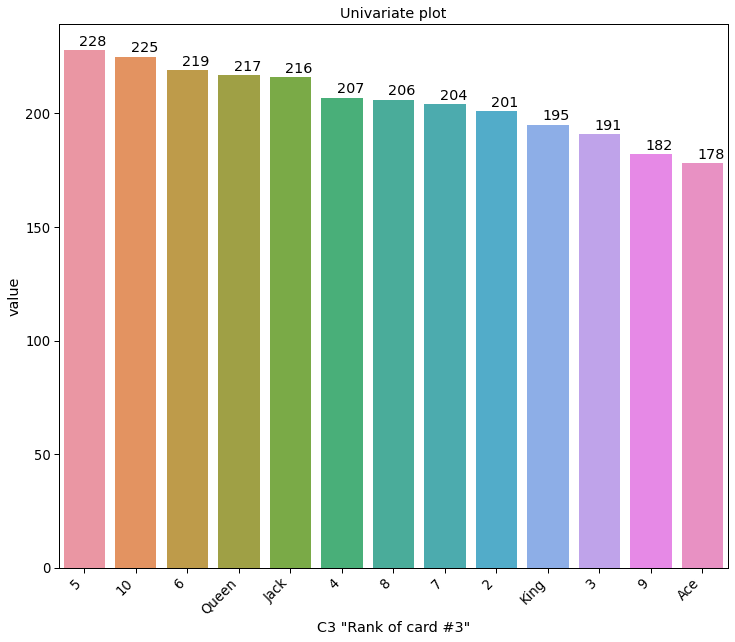

In [26]:
uni_categorical(df1[['C3 "Rank of card #3"']],'L')

We can see that the distribution is almost equal, with 5 having most instances and Ace with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' S4 "Suit of card #4" ' 
           Count  Percentage
Diamonds    692       25.93
Spades      678       25.40
Clubs       669       25.07
Hearts      630       23.60


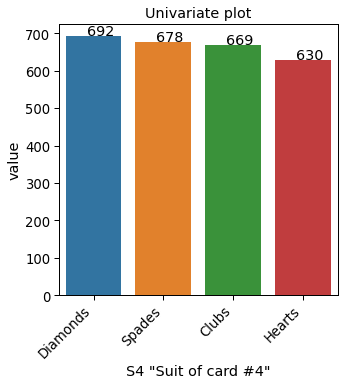

In [27]:
uni_categorical(df1[['S4 "Suit of card #4"']],'S')

We can see that the distribution is almost equal, with Diamonds ♦ having most instances and Hearts ❤ with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' C4 "Rank of card #4" ' 
        Count  Percentage
6        233        8.73
Jack     226        8.47
2        223        8.36
9        222        8.32
7        216        8.09
3        208        7.79
8        207        7.76
King     206        7.72
4        197        7.38
10       189        7.08
Ace      185        6.93
5        184        6.89
Queen    173        6.48


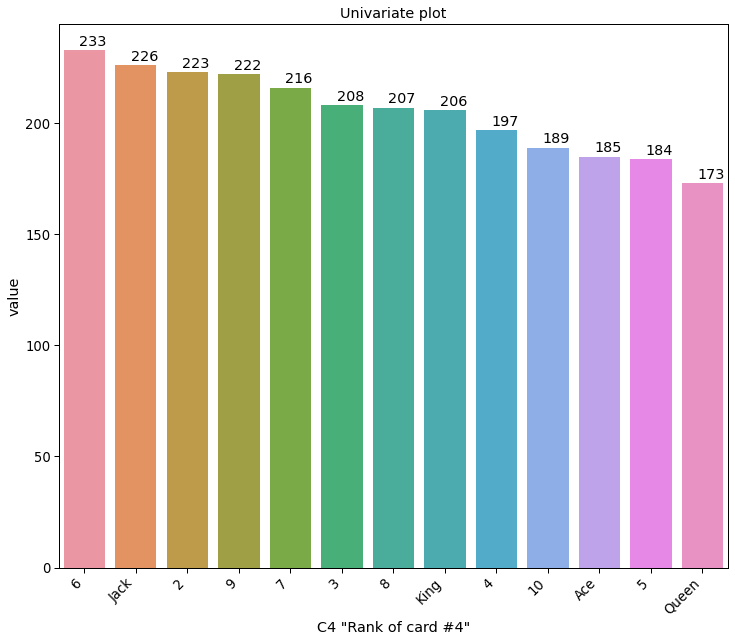

In [28]:
uni_categorical(df1[['C4 "Rank of card #4"']],'L')

We can see that the distribution is almost equal, with 6 having most instances and Queen with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' S5 "Suit of card #5" ' 
           Count  Percentage
Diamonds    718       26.90
Spades      671       25.14
Hearts      644       24.13
Clubs       636       23.83


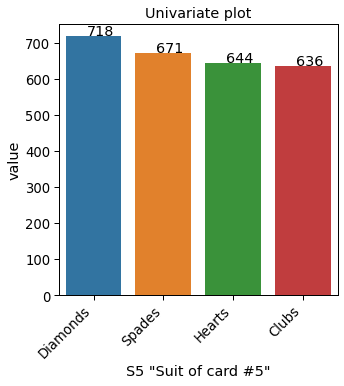

In [29]:
uni_categorical(df1[['S5 "Suit of card #5"']],'S')

We can see that the distribution is almost equal, with Diamonds ♦ having most instances and Clubs ♧ with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' C5 "Rank of card 5" ' 
        Count  Percentage
5        222        8.32
4        221        8.28
8        220        8.24
10       214        8.02
Jack     207        7.76
King     207        7.76
Ace      206        7.72
3        203        7.61
9        203        7.61
7        197        7.38
6        192        7.19
Queen    192        7.19
2        185        6.93


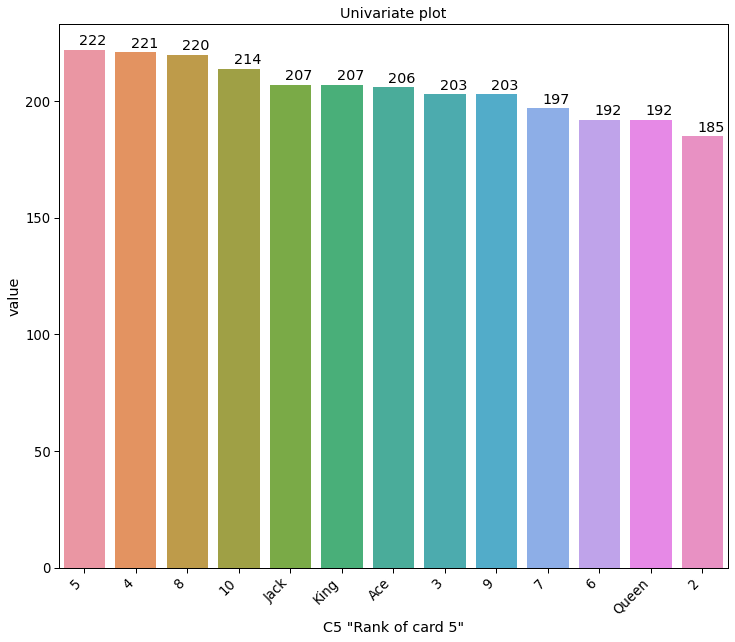

In [30]:
uni_categorical(df1[['C5 "Rank of card 5"']],'L')

We can see that the distribution is almost equal, with 5 having most instances and 2 with the least instances.

############### Univariate analysis - Categorical ###############

This is univariate analysis for ' CLASS "Poker Hand" ' 
                                                     Count  Percentage
Nothing in hand; not a recognized poker hand         1317       49.34
One pair; one pair of equal ranks within five c...   1148       43.01
Two pairs; two pairs of equal ranks within five...    121        4.53
Three of a kind; three equal ranks within five ...     50        1.87
Straight; five cards, sequentially ranked with ...     10        0.37
Flush; five cards with the same suit                    9        0.34
Royal flush; {Ace, King, Queen, Jack, Ten} + flush      5        0.19
Straight flush; straight + flush                        5        0.19
Full house; pair + different rank three of a kind       4        0.15


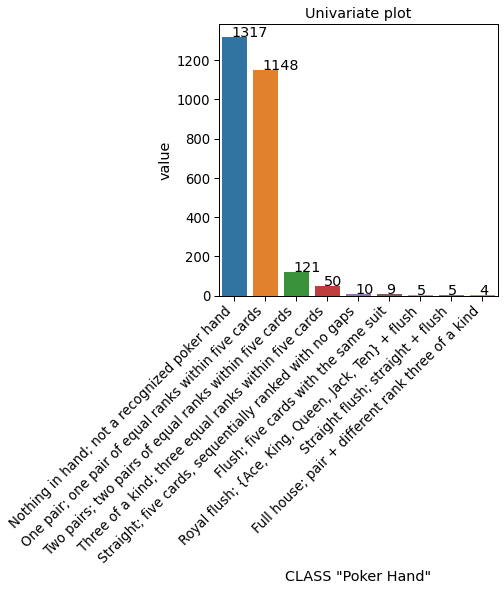

In [31]:
uni_categorical(df1[['CLASS "Poker Hand"']],'S')

We see that most instances are classified as Nothing in hand or One Pair.

### Bivariate Analysis

#### Looking at categorical features:

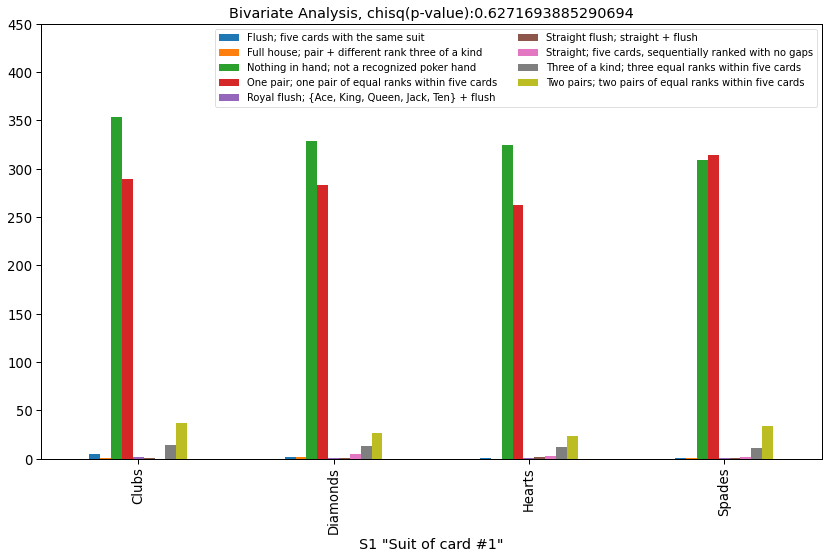

Chi-sqare's results:

DOF:  24 
p-value=  0.6271693885290694 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [32]:
bi_categorical_cat(df1['S1 "Suit of card #1"'], df1['CLASS "Poker Hand"'],'L')

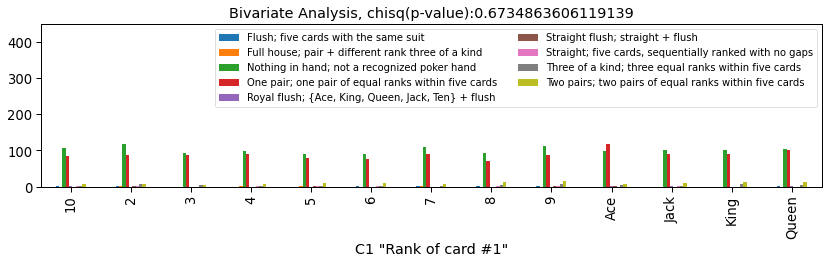

Chi-sqare's results:

DOF:  96 
p-value=  0.6734863606119139 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [33]:
bi_categorical_cat(df1['C1 "Rank of card #1"'], df1['CLASS "Poker Hand"'],'S')

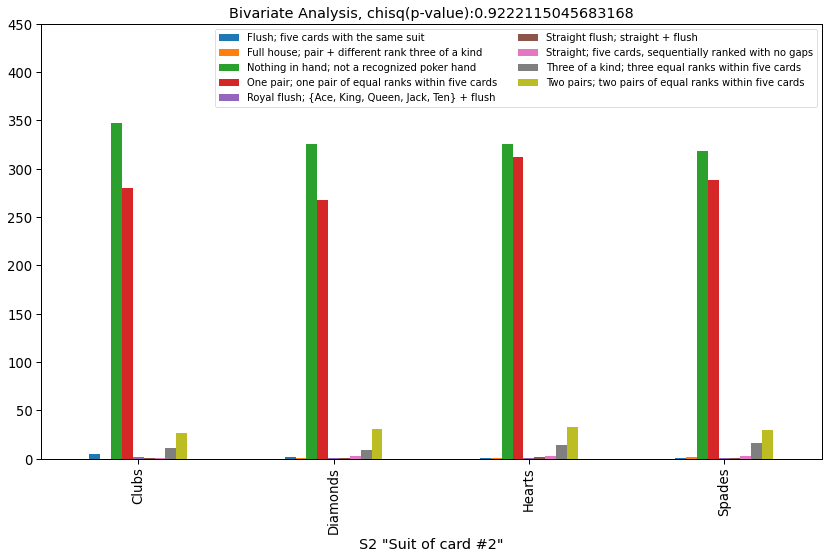

Chi-sqare's results:

DOF:  24 
p-value=  0.9222115045683168 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [34]:
bi_categorical_cat(df1['S2 "Suit of card #2"'], df1['CLASS "Poker Hand"'],'L')

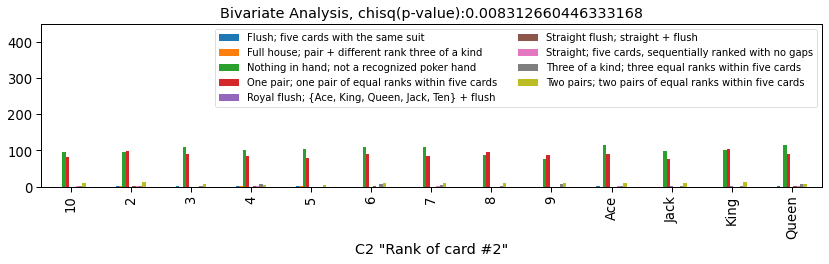

Chi-sqare's results:

DOF:  96 
p-value=  0.008312660446333168 

 Reject Null Hypothesis. There's some correlation between variables at 5% significance level.


In [35]:
bi_categorical_cat(df1['C2 "Rank of card #2"'], df1['CLASS "Poker Hand"'],'S')

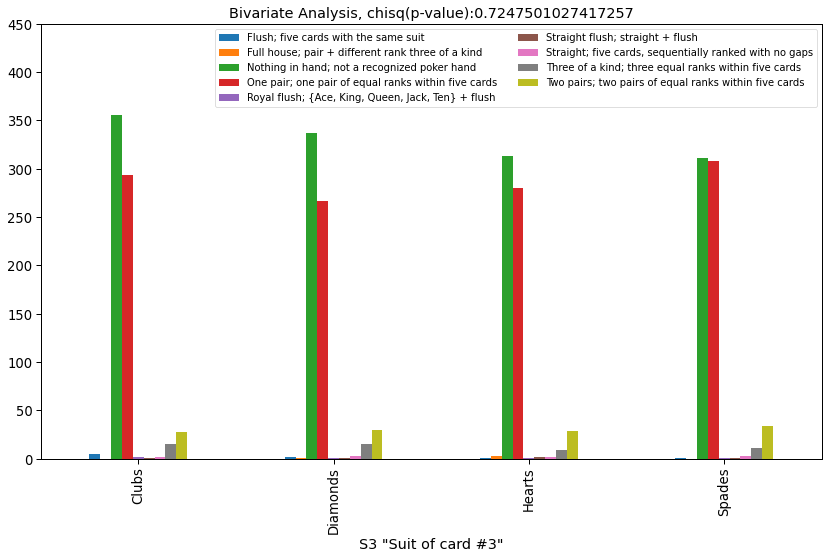

Chi-sqare's results:

DOF:  24 
p-value=  0.7247501027417257 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [36]:
bi_categorical_cat(df1['S3 "Suit of card #3"'], df1['CLASS "Poker Hand"'],'L')

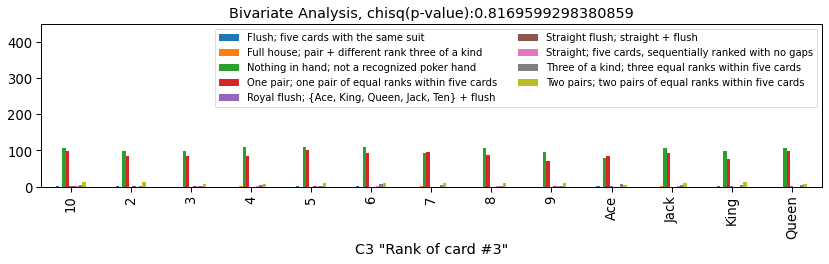

Chi-sqare's results:

DOF:  96 
p-value=  0.8169599298380859 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [37]:
bi_categorical_cat(df1['C3 "Rank of card #3"'], df1['CLASS "Poker Hand"'],'S')

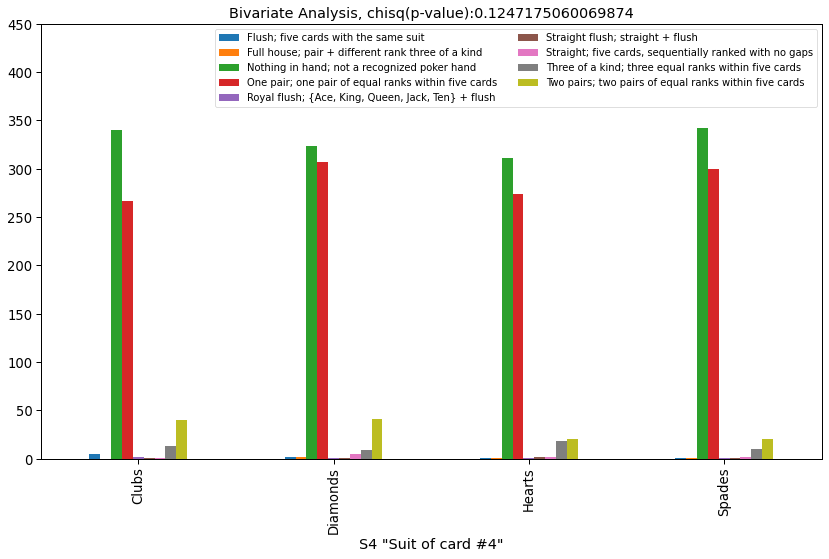

Chi-sqare's results:

DOF:  24 
p-value=  0.1247175060069874 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [38]:
bi_categorical_cat(df1['S4 "Suit of card #4"'], df1['CLASS "Poker Hand"'],'L')

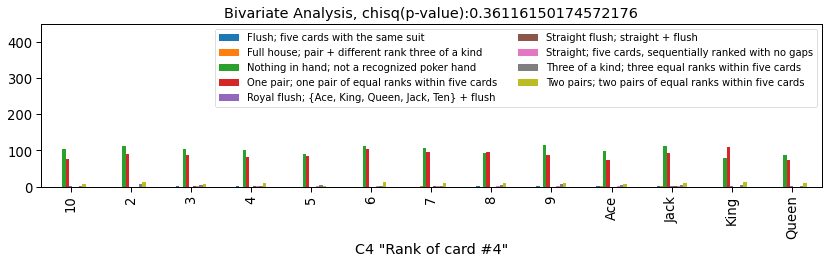

Chi-sqare's results:

DOF:  96 
p-value=  0.36116150174572176 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [39]:
bi_categorical_cat(df1['C4 "Rank of card #4"'], df1['CLASS "Poker Hand"'],'S')

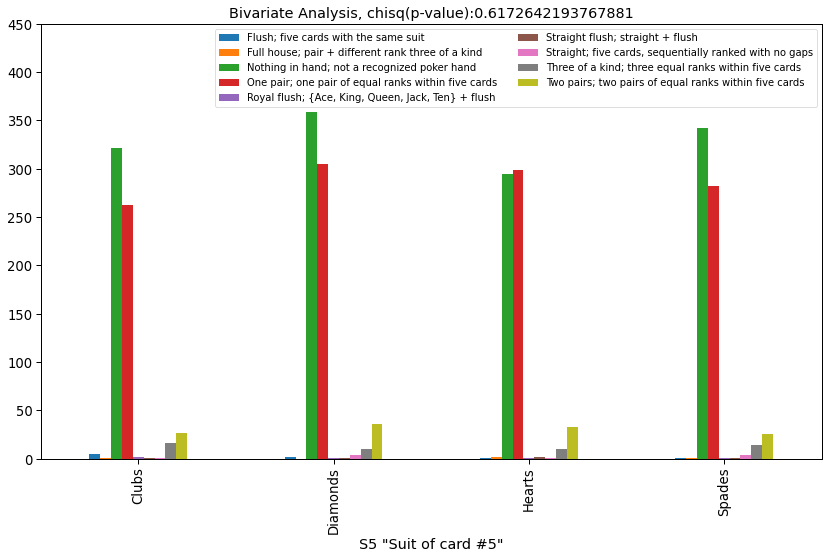

Chi-sqare's results:

DOF:  24 
p-value=  0.6172642193767881 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [40]:
bi_categorical_cat(df1['S5 "Suit of card #5"'], df1['CLASS "Poker Hand"'],'L')

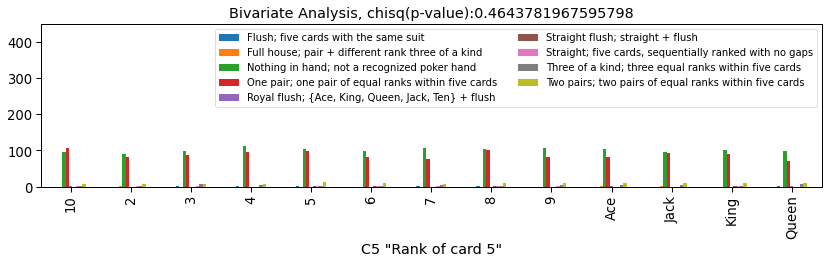

Chi-sqare's results:

DOF:  96 
p-value=  0.4643781967595798 

 Fail to reject Null Hypothesis. There's no correlation between variables at 5% significance level.


In [41]:
bi_categorical_cat(df1['C5 "Rank of card 5"'], df1['CLASS "Poker Hand"'],'S')

#### Extracting independent and dependent vars for training and test data sets:

In [42]:
target='CLASS "Poker Hand"'

# Creating copy of df for training:
df_dummy_train = df.copy()

#Dummy variable encoding for categorical features: 
cols = ['S1 "Suit of card #1"', 'C1 "Rank of card #1"', 'S2 "Suit of card #2"',
       'C2 "Rank of card #2"', 'S3 "Suit of card #3"', 'C3 "Rank of card #3"',
       'S4 "Suit of card #4"', 'C4 "Rank of card #4"', 'S5 "Suit of card #5"',
       'C5 "Rank of card 5"'] 

df_dummy_train = pd.get_dummies(df_dummy_train,columns=cols,drop_first=True).reset_index(drop = True)

X_train = df_dummy_train.drop([target],axis=1)
y_train = df_dummy_train[target]

#Testing data set:
df_dummy_test = pd.get_dummies(df_test,columns=cols,drop_first=True).reset_index(drop = True)

X_test = df_dummy_test.drop([target],axis=1)
y_test = df_dummy_test[target]

#### Scaling the features using training set:

In [43]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

## Fitting and validating Logistic Regression :

In [44]:
#We use saga solver for large dataset 
#and class_weight to deal with the imbalance
model = LogisticRegression(tol=0.90,solver='saga',class_weight='balanced') #, class_weight={'unacc':5, 'acc':3,'vgood':1, 'good':1}
print('Logistic Regression score: %f' % model.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

Logistic Regression score: 0.073032


We see that the accuracy is bad.

##### Confusion Matrix:

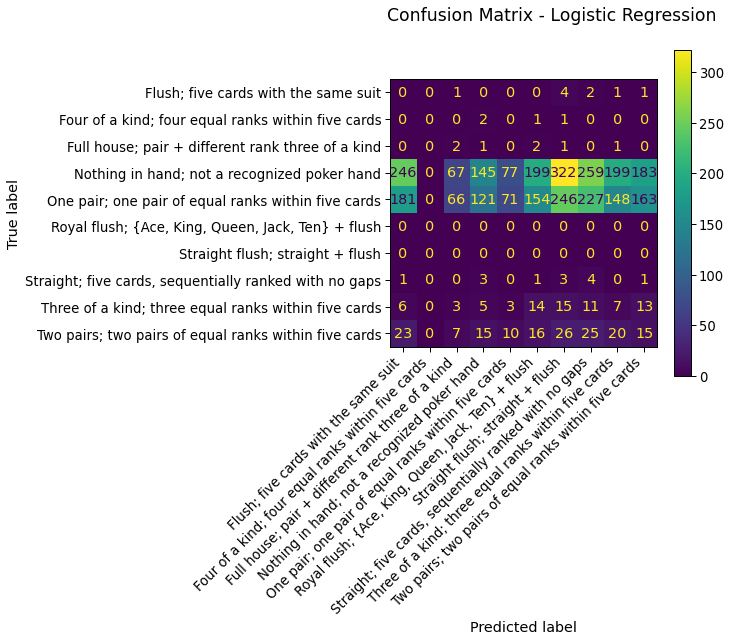

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
disp = metrics.plot_confusion_matrix(model, X_test_scaled, y_test,ax=ax)
disp.figure_.suptitle("Confusion Matrix - Logistic Regression") 
plt.xticks(rotation=45, ha='right')
plt.show()

We see above that a great number of One pair and Nothing in hand were the best classified, but the others categories are misplaced.

#####  Classification Report:

In [46]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred, zero_division=0))

                                                        precision    recall  f1-score   support

                  Flush; five cards with the same suit       0.00      0.00      0.00         9
    Four of a kind; four equal ranks within five cards       0.00      0.00      0.00         4
     Full house; pair + different rank three of a kind       0.01      0.29      0.03         7
          Nothing in hand; not a recognized poker hand       0.50      0.09      0.15      1697
   One pair; one pair of equal ranks within five cards       0.44      0.05      0.09      1377
    Royal flush; {Ace, King, Queen, Jack, Ten} + flush       0.00      0.00      0.00         0
                      Straight flush; straight + flush       0.00      0.00      0.00         0
Straight; five cards, sequentially ranked with no gaps       0.01      0.31      0.01        13
  Three of a kind; three equal ranks within five cards       0.02      0.09      0.03        77
 Two pairs; two pairs of equal ranks wi

We confirm the previous observation with the classification report.

### k-fold cross validation using logistic regression model:

In [47]:
scores = cross_val_score(model,X_test_scaled,y_test,cv=3)
print('Cross validation score(default parameter - "cv=3") is:',scores.mean())

scores = pd.Series(scores)
print('Minimum validation score is:',scores.min())
print('Maximum validation score is:', scores.max())


Cross validation score(default parameter - "cv=3") is: 0.11642828376678856
Minimum validation score is: 0.08617594254937164
Maximum validation score is: 0.15978456014362658


## Conclusion for Logistic Regression :

This is not a good model for this task.It has very low accuracy and the classification of classes is biased towards the dominant ones.

## Fitting  and validating KNN :

In [48]:
knn = neighbors.KNeighborsClassifier(2)  # default no. of neighbors is 5
print('KNN score: %f' % knn.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

KNN score: 0.554924


We see that the accuracy is very low.

##### Confusion Matrix:

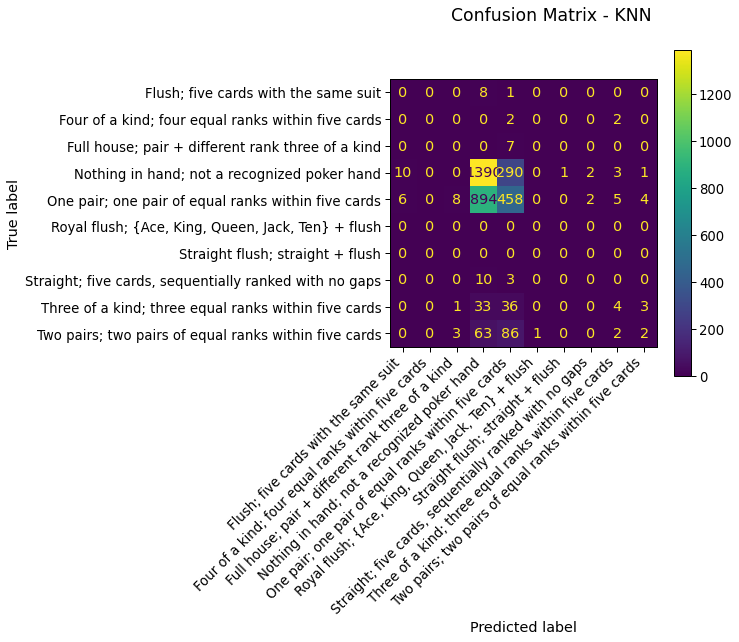

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
disp = metrics.plot_confusion_matrix(knn, X_test_scaled, y_test,ax=ax)
disp.figure_.suptitle("Confusion Matrix - KNN") #image of confusion matrix
plt.xticks(rotation=45, ha='right')
plt.show()

We see above that a great number of One pair and Nothing in hand were correctly classified, but others categories are very much misplaced.

#####  Classification Report:

In [50]:
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred, zero_division=0))

                                                        precision    recall  f1-score   support

                  Flush; five cards with the same suit       0.00      0.00      0.00         9
    Four of a kind; four equal ranks within five cards       0.00      0.00      0.00         4
     Full house; pair + different rank three of a kind       0.00      0.00      0.00         7
          Nothing in hand; not a recognized poker hand       0.58      0.82      0.68      1697
   One pair; one pair of equal ranks within five cards       0.52      0.33      0.41      1377
    Royal flush; {Ace, King, Queen, Jack, Ten} + flush       0.00      0.00      0.00         0
                      Straight flush; straight + flush       0.00      0.00      0.00         0
Straight; five cards, sequentially ranked with no gaps       0.00      0.00      0.00        13
  Three of a kind; three equal ranks within five cards       0.25      0.05      0.09        77
 Two pairs; two pairs of equal ranks wi

We confirm the previous observation with the classification report.

### k-fold cross validation using KNN model:

In [51]:
scores = cross_val_score(knn,X_test_scaled,y_test,cv=3)
print('Cross validation score(default parameter - "cv=3") is:',scores.mean())

scores = pd.Series(scores)
print('Minimum validation score is:',scores.min())
print('Maximum validation score is:', scores.max())


Cross validation score(default parameter - "cv=3") is: 0.5414563643959668
Minimum validation score is: 0.5350089766606823
Maximum validation score is: 0.5471698113207547


## Conclusion for KNN :

We see above that a great number of One pair and Nothing in hand were correctly classified, but others categories are very much misplaced.

## Fitting SVM:

In [52]:
SVM = SGDClassifier(loss='modified_huber',class_weight='balanced')
print('SVM score: %f' % SVM.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

SVM score: 0.337324


We see that the accuracy is bad.

##### Confusion Matrix:

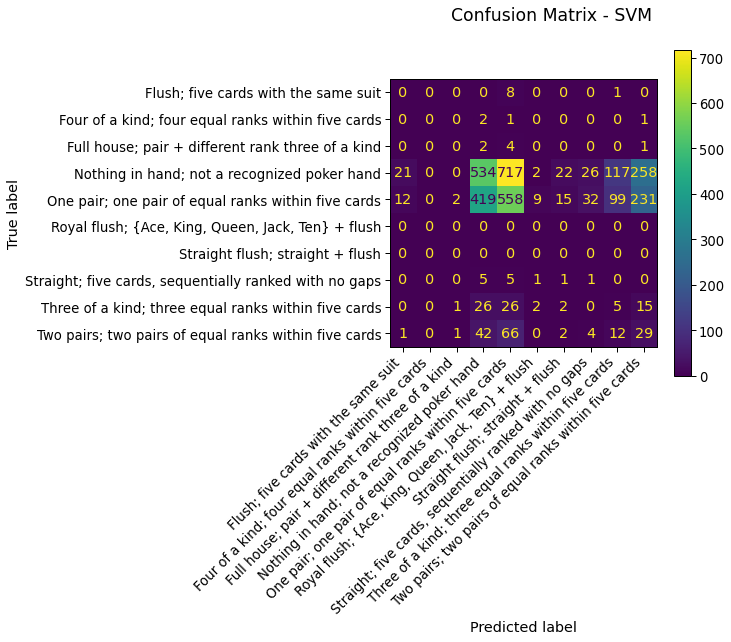

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
disp = metrics.plot_confusion_matrix(SVM, X_test_scaled, y_test,ax=ax)
disp.figure_.suptitle("Confusion Matrix - SVM") #image of confusion matrix
plt.xticks(rotation=45, ha='right')
plt.show()

We see above that a great number of One pair and Nothing in hand were best classified, but the others categories are misplaced.

#####  Classification Report:

In [54]:
y_pred = SVM.predict(X_test_scaled)
print(classification_report(y_test,y_pred, zero_division=0))

                                                        precision    recall  f1-score   support

                  Flush; five cards with the same suit       0.00      0.00      0.00         9
    Four of a kind; four equal ranks within five cards       0.00      0.00      0.00         4
     Full house; pair + different rank three of a kind       0.00      0.00      0.00         7
          Nothing in hand; not a recognized poker hand       0.52      0.31      0.39      1697
   One pair; one pair of equal ranks within five cards       0.40      0.41      0.40      1377
    Royal flush; {Ace, King, Queen, Jack, Ten} + flush       0.00      0.00      0.00         0
                      Straight flush; straight + flush       0.00      0.00      0.00         0
Straight; five cards, sequentially ranked with no gaps       0.02      0.08      0.03        13
  Three of a kind; three equal ranks within five cards       0.02      0.06      0.03        77
 Two pairs; two pairs of equal ranks wi

We confirm the previous observation with the classification report.

### k-fold cross validation using SVM model:

In [55]:
scores = cross_val_score(SVM,X_test_scaled,y_test,cv=3)
print('Cross validation score(default parameter - "cv=3") is:',scores.mean())

scores = pd.Series(scores)
print('Minimum validation score is:',scores.min())
print('Maximum validation score is:', scores.max())

Cross validation score(default parameter - "cv=3") is: 0.36336737420711546
Minimum validation score is: 0.3491921005385996
Maximum validation score is: 0.37376460017969454


## Conclusion for SVM :

We see above that a great number of One pair and Nothing in hand were correctly classified, but others categories are very much misplaced.

## Fitting AdaBoost:

In [56]:
ADA = AdaBoostClassifier(random_state=45)
print('Adaboost score: %f' % ADA.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

Adaboost score: 0.496259


We see that the accuracy is bad.

##### Confusion Matrix:

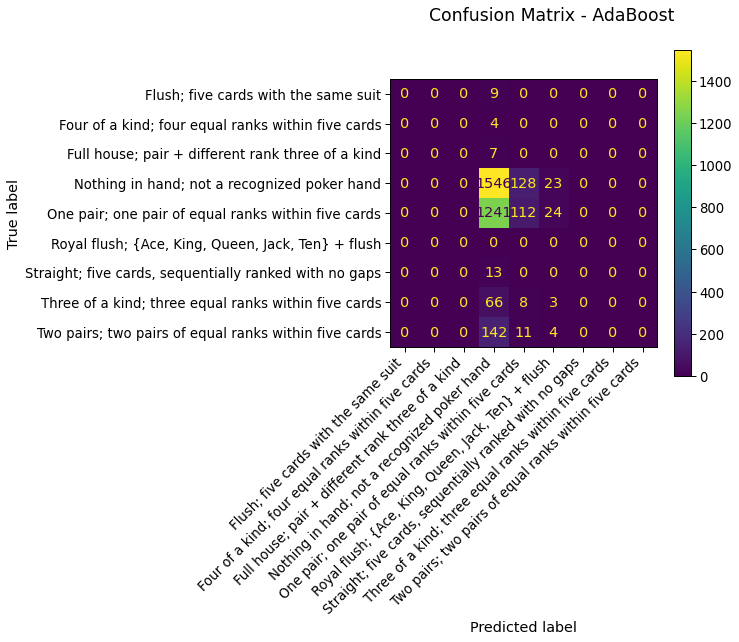

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
disp = metrics.plot_confusion_matrix(ADA, X_test_scaled, y_test,ax=ax)
disp.figure_.suptitle("Confusion Matrix - AdaBoost") #image of confusion matrix
plt.xticks(rotation=45, ha='right')
plt.show()

We see above that a great number of One pair and Nothing in hand were best classified, but others categories are misplaced.

#####  Classification Report:

In [58]:
y_pred = ADA.predict(X_test_scaled)
print(classification_report(y_test,y_pred, zero_division=0))

                                                        precision    recall  f1-score   support

                  Flush; five cards with the same suit       0.00      0.00      0.00         9
    Four of a kind; four equal ranks within five cards       0.00      0.00      0.00         4
     Full house; pair + different rank three of a kind       0.00      0.00      0.00         7
          Nothing in hand; not a recognized poker hand       0.51      0.91      0.65      1697
   One pair; one pair of equal ranks within five cards       0.43      0.08      0.14      1377
    Royal flush; {Ace, King, Queen, Jack, Ten} + flush       0.00      0.00      0.00         0
Straight; five cards, sequentially ranked with no gaps       0.00      0.00      0.00        13
  Three of a kind; three equal ranks within five cards       0.00      0.00      0.00        77
 Two pairs; two pairs of equal ranks within five cards       0.00      0.00      0.00       157

                                      

We confirm the previous observation with the classification report.

### k-fold cross validation using AdaBoost model:

In [59]:
scores = cross_val_score(ADA,X_test_scaled,y_test,cv=3)
print('Cross validation score(default parameter - "cv=3") is:',scores.mean())

scores = pd.Series(scores)
print('Minimum validation score is:',scores.min())
print('Maximum validation score is:', scores.max())

Cross validation score(default parameter - "cv=3") is: 0.47469974293252637
Minimum validation score is: 0.44654088050314467
Maximum validation score is: 0.5


## Conclusion for AdaBoost:

This is not a good model for this task.It has low accuracy.

## Fitting Random Forest:

In [60]:
Forest = RandomForestClassifier(random_state=45) #number of trees in the forest
print('Forest score: %f' % Forest.fit(X_train, y_train).score(X_test, y_test))

Forest score: 0.553128


We see that the accuracy is bad.

##### Confusion Matrix:

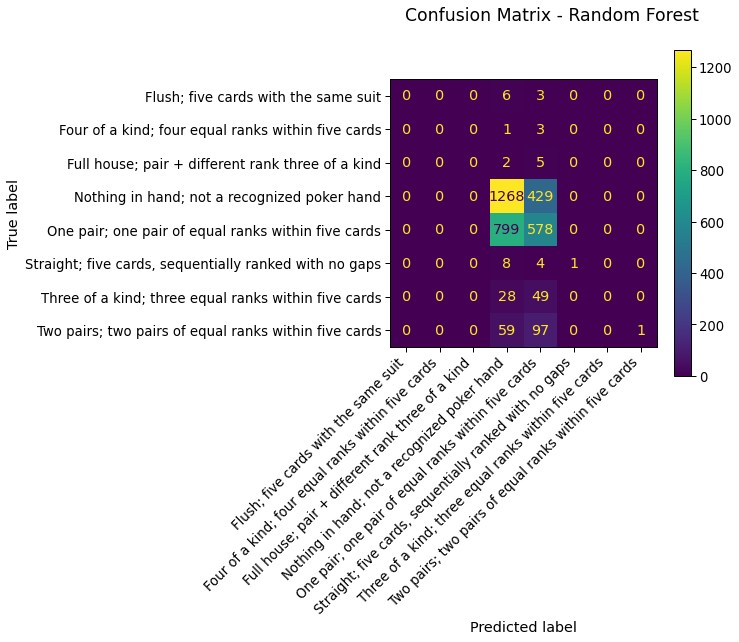

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
disp = metrics.plot_confusion_matrix(Forest, X_test, y_test,ax=ax)
disp.figure_.suptitle("Confusion Matrix - Random Forest") #image of confusion matrix
plt.xticks(rotation=45, ha='right')
plt.show()

We see above that a great number of One pair and Nothing in hand were best classified, but the others categories are misplaced.

#####  Classification Report:

In [62]:
y_pred = Forest.predict(X_test_scaled)
print(classification_report(y_test,y_pred, zero_division=0))

                                                        precision    recall  f1-score   support

                  Flush; five cards with the same suit       0.00      0.00      0.00         9
    Four of a kind; four equal ranks within five cards       0.00      0.00      0.00         4
     Full house; pair + different rank three of a kind       0.00      0.00      0.00         7
          Nothing in hand; not a recognized poker hand       0.58      0.75      0.66      1697
   One pair; one pair of equal ranks within five cards       0.49      0.42      0.45      1377
Straight; five cards, sequentially ranked with no gaps       1.00      0.08      0.14        13
  Three of a kind; three equal ranks within five cards       0.00      0.00      0.00        77
 Two pairs; two pairs of equal ranks within five cards       1.00      0.01      0.01       157

                                              accuracy                           0.55      3341
                                      

We confirm the previous observation with the classification report.

### k-fold cross validation using Random Forest model:

In [63]:
scores = cross_val_score(Forest,X_test_scaled,y_test,cv=3)
print('Cross validation score(default parameter - "cv=3") is:',scores.mean())

scores = pd.Series(scores)
print('Minimum validation score is:',scores.min())
print('Maximum validation score is:', scores.max())

Cross validation score(default parameter - "cv=3") is: 0.5525329560931336
Minimum validation score is: 0.5439856373429084
Maximum validation score is: 0.5651392632524708


## Conclusion for Random Forest:

This is not a good model for this task.It has low accuracy.

## Fitting Multilayer Perceptron:

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(80,),
                    solver='adam',  random_state=1,learning_rate_init=.1)
                        #adam: a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
print('Forest score: %f' % mlp.fit(X_train, y_train).score(X_test, y_test))

Forest score: 0.504041


We see that the accuracy is bad.

##### Confusion Matrix:

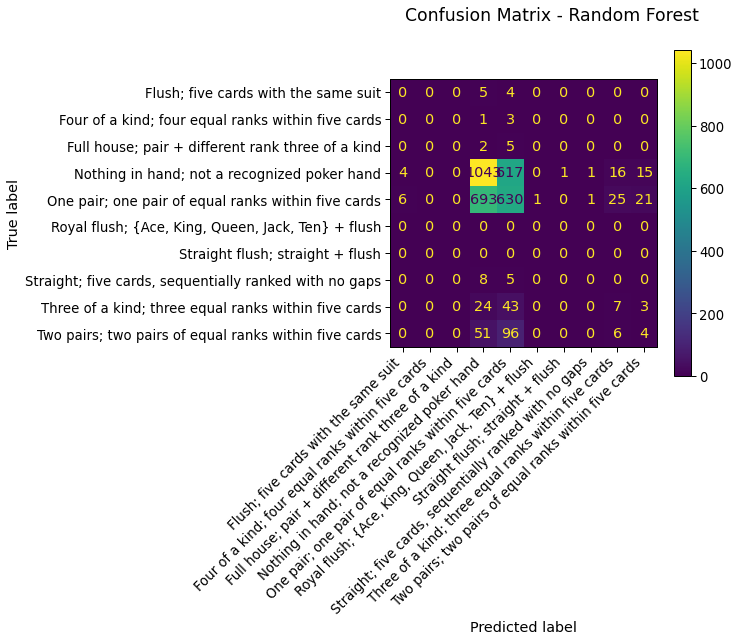

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
disp = metrics.plot_confusion_matrix(mlp, X_test, y_test,ax=ax)
disp.figure_.suptitle("Confusion Matrix - Random Forest") 
plt.xticks(rotation=45, ha='right')
plt.show()

We see above that a great number of One pair and Nothing in hand were best classified, but the others categories are misplaced.

#####  Classification Report:

In [66]:
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test,y_pred, zero_division=0))

                                                        precision    recall  f1-score   support

                  Flush; five cards with the same suit       0.00      0.00      0.00         9
    Four of a kind; four equal ranks within five cards       0.00      0.00      0.00         4
     Full house; pair + different rank three of a kind       0.00      0.00      0.00         7
          Nothing in hand; not a recognized poker hand       0.54      0.20      0.29      1697
   One pair; one pair of equal ranks within five cards       0.42      0.82      0.55      1377
    Royal flush; {Ace, King, Queen, Jack, Ten} + flush       0.00      0.00      0.00         0
Straight; five cards, sequentially ranked with no gaps       0.00      0.00      0.00        13
  Three of a kind; three equal ranks within five cards       0.00      0.00      0.00        77
 Two pairs; two pairs of equal ranks within five cards       0.00      0.00      0.00       157

                                      

We confirm the previous observation with the classification report.

### k-fold cross validation using Multilayer Perceptron model:

In [67]:
scores = cross_val_score(mlp,X_test_scaled,y_test,cv=3)
print('Cross validation score(default parameter - "cv=3") is:',scores.mean())

scores = pd.Series(scores)
print('Minimum validation score is:',scores.min())
print('Maximum validation score is:', scores.max())

Cross validation score(default parameter - "cv=3") is: 0.562708655608625
Minimum validation score is: 0.5403949730700179
Maximum validation score is: 0.5754039497307002


# Conclusions/Inferences

Despite having the worst accuracy, the better model that classified the categories was **Logistic Regression** as showed by the confusion matrix. All others, with the current parameters defined, favored the dominant classes over the others.

Although, we still have to find a better classification model to have great accuracy towards all classes.